In [2]:
# Log-Distance Path Loss model with shadowing
# RSSI = RSSI(d0) + 10nlog(d/d0) + X

# International Telecommunication Union (ITU) model
# RSSI = 20log(f) + Nlog(d) + Pf(n) - 28

# Empirical model
# RSSI = 10nlog(d) + A

In [20]:
beacon = {
    'id' : 'Haylou',
    'status': 'IDLE', 
    'stations': {'1':12, '2':5.5, '3':3.25, '4':7.8},
    'coordinates': (None,None) 
}
stations = {
    '1': (0.5,0.5),
    '2': (2,3),
    '3': (2,5),
    '4': (6,8)
}

In [22]:
# returns three nearest stations to the beacon
tri_distance = sorted(beacon['stations'].items(), key=lambda x:x[1])[:3]
print(tri_distance)
xa, ya = stations[tri_distance[0][0]]
xb, yb = stations[tri_distance[1][0]]
xc, yc = stations[tri_distance[2][0]]
ra = tri_distance[0][1]
rb = tri_distance[1][1]
rc = tri_distance[2][1] 
S = (pow(xc,2)-pow(xb,2)+pow(yc,2)-pow(yb,2)+pow(rb,2)-pow(rc,2))/2.0
T = (pow(xa,2)-pow(xb,2)+pow(ya,2)-pow(yb,2)+pow(rb,2)-pow(ra,2))/2.0
y = ((T*(xb-xc))-(S*(xb-xa))) / (((ya-yb)*(xb-xc))-((yc-yb)*(xb-xa)))
x = ((y*(ya-yb))-T) / (xb-xa)
print('x: ', x)
print('y: ', y)

[('3', 3.25), ('2', 5.5), ('4', 7.8)]


ZeroDivisionError: float division by zero

In [23]:
import numpy as np
a = np.array([[(pow(ra,2)-pow(rb,2))-(pow(xa,2)-pow(xb,2))-(pow(ya,2)-pow(yb,2)), 2*(yb-ya)], [(pow(ra,2)-pow(rc,2))-(pow(xa,2)-pow(xc,2))-(pow(ya,2)-pow(yc,2)),2*(yc-ya)]])
c = np.array([[2*(xb-xa), 2*(yb-ya)], [2*(xc-xa), 2*(yc-ya)]])
b = np.array([[2*(yb-ya), (pow(ra,2)-pow(rb,2))-(pow(xa,2)-pow(xb,2))-(pow(ya,2)-pow(yb,2))], [2*(yc-ya), (pow(ra,2)-pow(rc,2))-(pow(xa,2)-pow(xc,2))-(pow(ya,2)-pow(yc,2))]])
x = np.linalg.det(a) / np.linalg.det(c)
print('x: ', x)
print('y: ', y)

x:  -4.1010937499999995
y:  8.921875


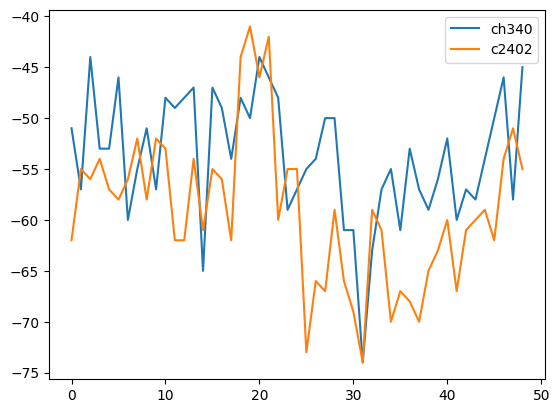

In [4]:
st1 = [-51,-57,-44,-53,-53,-46,-60,-55,-51,-57,-48,-49,-48,-47,-65,-47,-49,-54,-48,-50,-44,-46,-48,-59,-57,-55,-54,-50,-50,-61,-61,-74,-63,-57,-55,-61,-53,-57,-59,-56,-52,-60,-57,-58,-54,-50,-46,-58,-45]
st2 = [-62,-55,-56,-54,-57,-58,-56,-52,-58,-52,-53,-62,-62,-54,-61,-55,-56,-62,-44,-41,-46,-42,-60,-55,-55,-73,-66,-67,-59,-66,-69,-74,-59,-61,-70,-67,-68,-70,-65,-63,-60,-67,-61,-60,-59,-62,-54,-51,-55]
import matplotlib.pyplot as plt
plt.plot(st1, label='ch340')
plt.plot(st2, label='c2402')
plt.legend()
plt.show()

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")

In [56]:
dataset = pd.read_csv('env_model.csv')
dataset

,ID,RSSI,station,distance
0,Haylou GT1 XR,-40,1,0.5
1,Haylou GT1 XR,-38,1,0.5
2,Haylou GT1 XR,-39,1,0.5
3,Haylou GT1 XR,-40,1,0.5
4,Haylou GT1 XR,-39,1,0.5
...,...,...,...,...
505,Haylou GT1 XR,-69,1,5.0
506,Haylou GT1 XR,-69,1,5.0
507,Haylou GT1 XR,-57,1,5.0
508,Haylou GT1 XR,-57,1,5.0


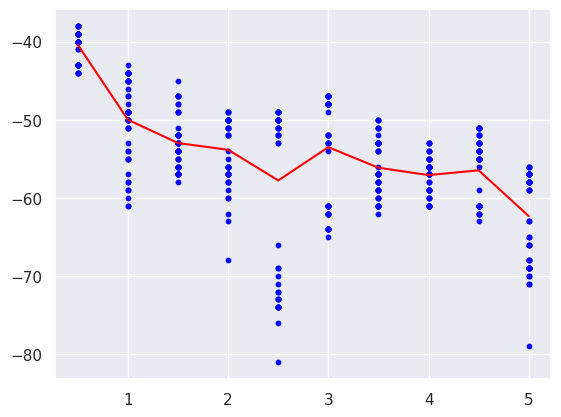

In [57]:
x = list(dataset.values[:,3])
y = list(dataset.values[:,1])
plt.scatter(x, y, c="blue", s=10)
distances = np.unique(x)
ave_rssi = []
for dis in distances:
    ave_rssi.append(np.mean(dataset.values[dataset.values[:,3]==dis][:,1]))
plt.plot(distances, ave_rssi, c="red")
plt.show()